# Project 4 - 1-94 Interstate Highway

Interstate 94 (I-94) is an east-west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States. The dataset we will be analyzing contains Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. The dataset also includes hourly weather features and holidays for impacts on traffic volume.



The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

In [1]:
#Import Pandas
import pandas as pd
#Read in the CSV File
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [2]:
#Explore the dataset 
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [3]:
#first five rows
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
#last five rows
traffic.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


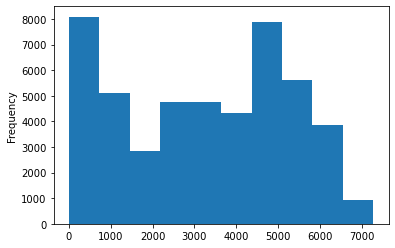

In [5]:
#Import matplotlib. Add %matplotlib inline so jupyter notebook can read it
import matplotlib.pyplot as plt
%matplotlib inline

traffic['traffic_volume'].plot.hist()

In [6]:
#Explore information regarding traffic volume column
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We can see that a traffic volume of between 0-500 and 4500-5000 tend to have the most frequency. Similarly, we can see that the minimum value is 0. This may be due to the effects of nighttime on traffic volume. At night, the traffic volume decreases to zero in many instances. Likewise, the increased traffic volume is probably correlated with daytime or early evening hours, when people are going to or returning from work.

Let's try and isolate the values for day and night traffic volume. First let's convert the date_time column to datetime format

In [7]:
#convert date_time column to datetime format 
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [8]:
#Check hours for every instance in date_time column
traffic['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [9]:
#isolate daytime and nightime data using boolean logic
daytime = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
print(daytime.shape)

nighttime = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]
print(nighttime.shape)

(23877, 9)
(24327, 9)


We will now plot histograms of traffic volume for both day and night and cmpare the results.

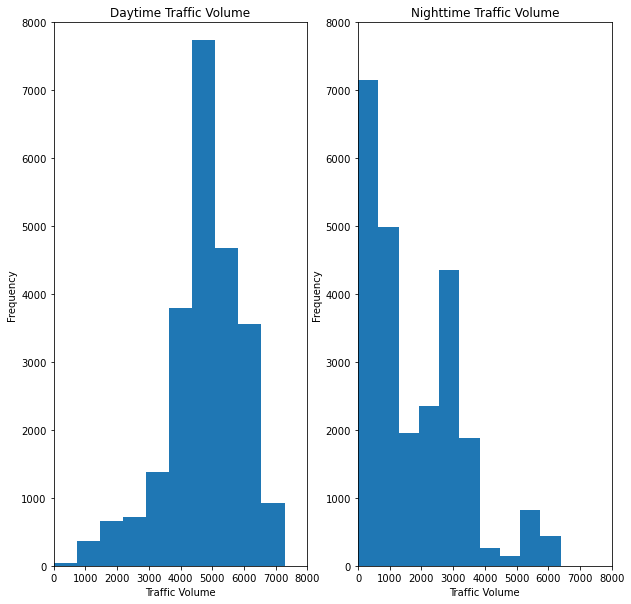

In [30]:
#plot histograms of traffic_volume for both day and night
plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
daytime['traffic_volume'].plot.hist()
plt.title('Daytime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
#set limits on x and y axis
plt.ylim([0,8000])
plt.xlim([0,8000])
plt.subplot(1,2,2)
nighttime['traffic_volume'].plot.hist()
plt.title('Nighttime Traffic Volume')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
#set limits on x and y axis
plt.ylim([0,8000])
plt.xlim([0,8000])
plt.show()

In [32]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [33]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

We can see that the Daytime traffic volume histogram is a normal distribution (Gaussian Distribution). On the other hand, the Nighttime traffic volume histogram is right skewed (tail is pointing to the right).

Additionally, we can see that the daytime series has a significantly higher mean than the nighttime series. Since traffic is light at night and our goal is to find indicators of heavy traffic, we should not be using nighttime data.

Let's group the traffic volume by mean per month of the year and then generate a line plot to visualize how the traffic volume changes.

In [35]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

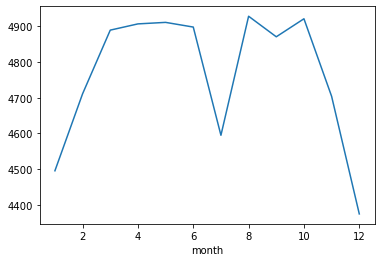

In [37]:
by_month['traffic_volume'].plot.line()

We can see that traffic volume begins to increase as the winter comes to an end and then it plateaus around March. In July we can see there is a dip in traffic volume followed by a sharp increase. Finally, the volume decreases again towards the winter. The reason for this is likely associated with change in the seasons as well as holidays. Rougher climate conditions leads to decreased traffic volume in the winter. The decrease in July is likely explained by people taking time off in the summer around July 4.

We will now do the same for days of the week.

In [40]:
daytime['dayofweek'] = daytime['date_time'].dt.dayofweek
by_dayofweek = daytime.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'] #0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

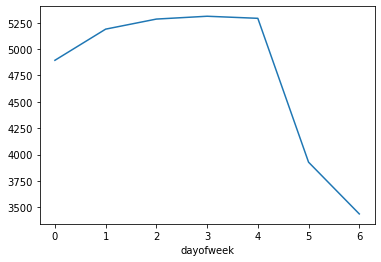

In [41]:
by_dayofweek['traffic_volume'].plot.line()

We can quickly see that there is a difference between business days and the weekend. Traffic volume quickly declines on Saturday and Sunday.

In [45]:
daytime['hour'] = daytime['date_time'].dt.hour
business_days = daytime.copy()[daytime['dayofweek'] <= 4] #4 is Friday
weekend = daytime.copy()[daytime['dayofweek'] >= 5] #5 is Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()
print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


(1500.0, 6250.0)

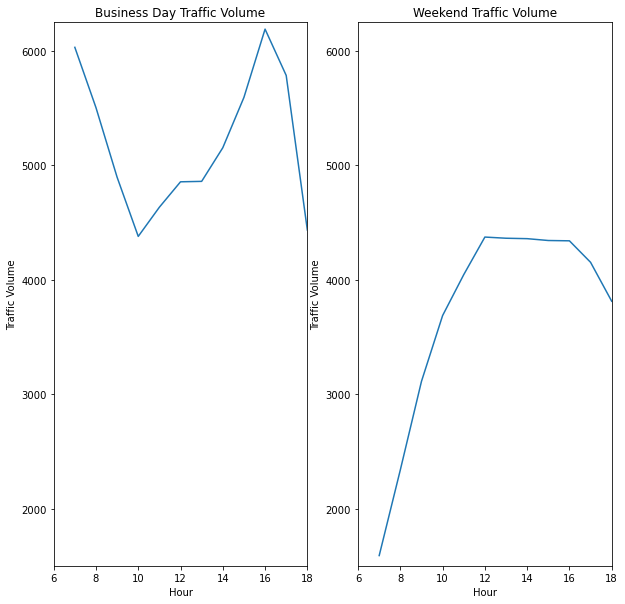

In [55]:
plt.figure(figsize = (10, 10))
plt.subplot(1,2,1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Business Day Traffic Volume')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.xlim([6,18])
plt.ylim([1500,6250])
plt.subplot(1,2,2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Weekend Traffic Volume')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.xlim([6,18])
plt.ylim([1500,6250])

We can see that the traffic volume varies signficantly between business days and weekends. The lowest mean for traffic volume by hour on a business day is approximately equal to the highest mean for traffic volume by hour on the weekend. 

We can see that business day rush hour happens at 8am and between 4-5pm. On the weekends, rush hour happens between noon and 5pm.

Now, we will look at weather as a potential indicator of heavy traffic. Let's start by checking the correlation values between the numerical weather columns and traffic_volume.

In [61]:
daytime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   month                23877 non-null  int64         
 10  dayofweek            23877 non-null  int64         
 11  hour                 23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 2.4+ MB


In [65]:
daytime.corr()[['traffic_volume','temp', 'rain_1h', 'snow_1h', 'clouds_all']]

,traffic_volume,temp,rain_1h,snow_1h,clouds_all
temp,0.128317,1.000000,0.010815,-0.019286,-0.135519
rain_1h,0.003697,0.010815,1.000000,-0.000091,0.004993
snow_1h,0.001265,-0.019286,-0.000091,1.000000,0.027721
clouds_all,-0.032932,-0.135519,0.004993,0.027721,1.000000
traffic_volume,1.000000,0.128317,0.003697,0.001265,-0.032932
month,-0.022337,0.222072,0.001176,0.026768,0.000595
dayofweek,-0.416453,0.000188,-0.009683,-0.008814,-0.041980
hour,0.172704,0.162691,0.008279,0.003923,0.023685


We can see that temperature and traffic_volume have the strongest correlation (positive).

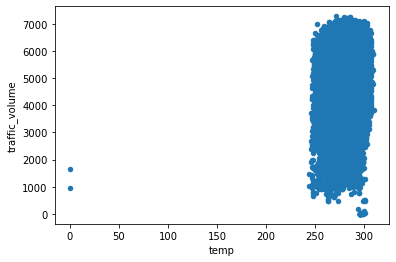

In [66]:
daytime.plot.scatter(x = 'temp', y = 'traffic_volume')

We can see that temp is not a reliable indicator of heavy traffic volume. All of the points on the scatter plot are located within a small range on the x-axis (temp). These points range in traffic volume from the minimum to maximum values within this temperature range. 

We will now look at the categorical weather-related columns: weather_main and weather_description. First we will begin by calculating the average traffic volume associated with each unique value in these two columns.

In [67]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_description = daytime.groupby('weather_description').mean()

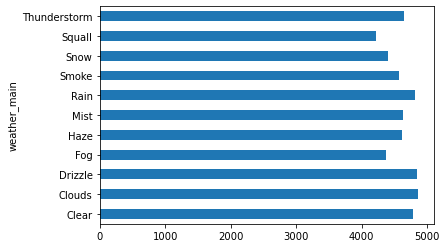

In [68]:
#generate horizontal bar plot for traffic volume column of by_weather_main
by_weather_main['traffic_volume'].plot.barh()

None of the weather types result in a mean that exceeds 5,000 cars. There is no single indicator of heavy traffic in this column. 

Let's look at the by_weather_description column next.

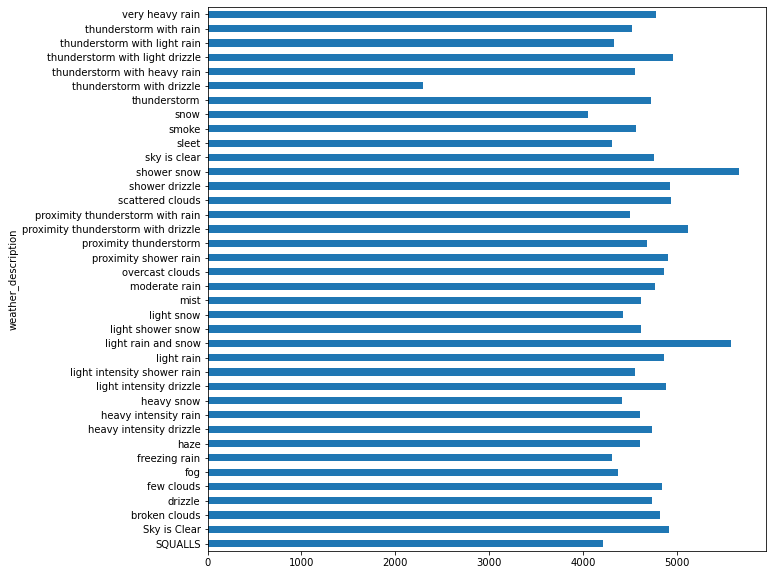

In [87]:
by_weather_description['traffic_volume'].plot.barh(figsize = (10,10))
plt.show()

We can see that three weather descriptions are correlated with an average traffic volume higher than 5,000 cars. The three descriptions are 'light rain and snow', 'shower snow', and 'proximity thunderstorm'.

# Conclusions

After analyzing the I-94 Interstate Highway Dataset, we have been able to determine some of the predictors of heavy traffic. The first major indicator is that heavy traffic normally occurs during daytime hours instead of nighttime. The second indicator is that heavy traffic is higher on business days than the weekend. Furthermore, within business days or weekends, it was even higher during rush hour. As a broader indicator, we can see that traffic volume increases in months where the weather is more suitable for driving (e.g. summer instead of winter). Lastly, we were able to identify that certain weather conditions, such as light rain and snow, shower snow, and proximity thunderstorm, are more likely to result in heavy traffic. This is likely due to limited driving conditions. 